In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Получение списка классов

Вытащим список классов товаров из справочника:

In [5]:
classesData = pd.read_excel("../../data/Справочники/Кабель справочник МТР.xlsx")

In [6]:
classesData.head()

,Материал,Краткий текст материала,Класс,Название
0,1012856,КАБЕЛЬ ИНТЕРФЕЙСНЫЙ,G2170,ПРОДУКЦИЯ КАБЕЛЬНАЯ НЕ НОРМАЛИЗОВАННАЯ
1,1013961,"Кабель КГ 3х2,5",G21050101,Кабели силовые с изоляцией из ЭПР
2,1028224,Кабель КГ 4х10,G21050101,Кабели силовые с изоляцией из ЭПР
3,1030875,"Кабель КГ 2х2,5",G21050101,Кабели силовые с изоляцией из ЭПР
4,1036918,Саморегул.греющий кабель 20QTVR2-CT,G2110,Кабели греющие


Важно! Читаемые названия классов из справочника могут не совпадать с читаемыми названиями классов из ведомости! 

In [7]:
classes = classesData['Класс'].astype(str).unique()

In [8]:
classes

array(['G2170', 'G21050101', 'G2110', 'G21050102', 'G21050301', 'G210402',
       'G21040101', 'G2106', 'G210506', 'G210502', 'G21050104', 'G210470',
       'G21050370', 'G2107', 'G21050302', 'G210509', 'G210404', 'G210514',
       'G2160', 'G210508', 'G2109', 'G210513', 'G210512', 'G210511',
       'G21040102', 'G21050103', 'G210403', 'G210504', 'G210507',
       'G210515', 'G2114', 'G2112', 'G210102', 'G210505', 'G210503',
       'G210516', 'G2104', 'G2108', 'G2111', 'G210510'], dtype=object)

In [9]:
len(classes)

40

# Предварительная работа с историей оферт

Цель этого этапа работы с историей оферт - получить список тех айдишников поставщиков, которые появлялись в истории оферт.

In [7]:
offersData = pd.read_csv("../../data/Исторические данные по офертам поставщиков на лот.csv")

In [8]:
offersIDs = offersData['Кредитор'].unique().astype(int)

In [9]:
len(offersIDs)

881

# Предварительная работа с историей закупок

Цель этого этапа работы с историей заказов - получить список тех айдишников поставщиков, которые появлялись в истории заказов

In [10]:
purchasesData = pd.read_csv("../../data/Исторические совершенные закупки товаров.csv")

In [11]:
purchasesIDs = purchasesData['Поставщик'].unique().astype(int)

In [12]:
len(purchasesIDs)

300

Замечание: если вглядываться к совершённые закупки, то там много строк с пропуском в айдишнике поставщика

# Работа со справочником поставщиков

Загрузим файл с поставщиками:

In [13]:
suppliersData = pd.read_excel("../../data/Справочники/Справочник поставщиков.XLSX")

In [14]:
suppliersData

,Кредитор,П/индекс,Город
0,0000000003,NaN,ОМСК
1,0000000004,NaN,ОМСК
2,0000000005,NaN,ОМСК
3,0000000006,NaN,NaN
4,0000000008,NaN,ОМСК
...,...,...,...
219830,CITI,125047,ГОРОД МОСКВА
219831,KOMB,119107,Г. МОСКВА
219832,MMB,119034,Г.МОСКВА
219833,SOBI,121248,МОСКВА


Уберём тех поставщиков, для которых неизвестен ни город, ни почтовый индекс:

In [15]:
suppliersData = suppliersData[suppliersData['П/индекс'].notna() | suppliersData['Город'].notna()]

In [16]:
suppliersData

,Кредитор,П/индекс,Город
0,0000000003,NaN,ОМСК
1,0000000004,NaN,ОМСК
2,0000000005,NaN,ОМСК
4,0000000008,NaN,ОМСК
6,0000000010,NaN,ОМСК
...,...,...,...
219829,9000000036,410008,САРАТОВ
219830,CITI,125047,ГОРОД МОСКВА
219831,KOMB,119107,Г. МОСКВА
219832,MMB,119034,Г.МОСКВА


А теперь уберём тех поставщиков, у которых при непустом Почтовом индексе индекс точно не имеет формат:

In [17]:
suppliersData = suppliersData[suppliersData['П/индекс'].isnull() | suppliersData['П/индекс'].str.match('^[1-9]\d{5}$')]

In [18]:
suppliersData

,Кредитор,П/индекс,Город
0,0000000003,NaN,ОМСК
1,0000000004,NaN,ОМСК
2,0000000005,NaN,ОМСК
4,0000000008,NaN,ОМСК
6,0000000010,NaN,ОМСК
...,...,...,...
219829,9000000036,410008,САРАТОВ
219830,CITI,125047,ГОРОД МОСКВА
219831,KOMB,119107,Г. МОСКВА
219832,MMB,119034,Г.МОСКВА


Последние четыре строчки крайне странные: айдишники в них имеют буквенный формат. Исключим их:

In [19]:
suppliersData = suppliersData.head(-4)

In [20]:
suppliersData

,Кредитор,П/индекс,Город
0,0000000003,NaN,ОМСК
1,0000000004,NaN,ОМСК
2,0000000005,NaN,ОМСК
4,0000000008,NaN,ОМСК
6,0000000010,NaN,ОМСК
...,...,...,...
219822,9000000026,347540,Г.ПРОЛЕТАРСК
219823,9000000027,352900,Г.АРМАВИР
219824,9000000028,403870,Г. КАМЫШИН
219825,9000000029,NaN,ГОРОД МОСКВА


Примерно каждый двадцатый айдишник имеет непустой город, но пустой индекс:

In [21]:
suppliersData[suppliersData['П/индекс'].isnull()]

,Кредитор,П/индекс,Город
0,0000000003,NaN,ОМСК
1,0000000004,NaN,ОМСК
2,0000000005,NaN,ОМСК
4,0000000008,NaN,ОМСК
6,0000000010,NaN,ОМСК
...,...,...,...
219625,7175110781,NaN,ТОБОЛЬСК
219630,7175110786,NaN,ВЯТСКИЕ ПОЛЯНЫ
219758,8000000076,NaN,Г. МОСКВА
219787,8000000132,NaN,Г. МОСКВА


Начнём всматриваться в почтовые индексы: белорусские и казахстанские индексы имеют схожий с российским формат. Чтобы избавиться от них, введём лист российских индексов, который заполним из датабазы:

In [22]:
russianIndices = [0]*61325

In [23]:
with open('../../supplementary/post_indices.sql') as f:
    line = f.readline()
    line = f.readline()
    line = f.readline()
    line = f.readline()
    i = 0
    while i < 61325: 
        #print(line[:6])
        russianIndices[i] = int(line[:6])
        i += 1
        line = f.readline()
    f.close()

Создадим маски - массивы нулей и единиц. Три вида массивов: 0) Единицы там, где индекс пуст или совпадает по формату с российским. 1) Единицы там, где айдишник есть в списке оферт. 2) Единицы там, где айдишник есть в списке заказов

In [24]:
mask0 = np.zeros(len(suppliersData), dtype=bool)
mask1 = np.zeros(len(suppliersData), dtype=bool)
mask2 = np.zeros(len(suppliersData), dtype=bool)
for i in range(len(mask0)):
    try:
        mask0[i] = (int(suppliersData.iloc[i]['П/индекс'])) in russianIndices
    except ValueError:
        mask0[i] = True
    mask1[i] = (int(suppliersData.iloc[i]['Кредитор'])) in offersIDs
    mask2[i] = (int(suppliersData.iloc[i]['Кредитор'])) in purchasesIDs
    if (i%1000 == 0):
        print(i, mask1[i])
    #mask[i] += mask0[i]

0 False
1000 False
2000 False
3000 False
4000 False
5000 False
6000 False
7000 False
8000 False
9000 False
10000 False
11000 False
12000 False
13000 False
14000 False
15000 False
16000 False
17000 False
18000 False
19000 False
20000 False
21000 False
22000 False
23000 False
24000 False
25000 False
26000 False
27000 False
28000 False
29000 False
30000 False
31000 False
32000 False
33000 False
34000 False
35000 False
36000 False
37000 False
38000 False
39000 False
40000 False
41000 False
42000 False
43000 False
44000 False
45000 False
46000 False
47000 False
48000 False
49000 True
50000 False
51000 False
52000 False
53000 False
54000 False
55000 False
56000 False
57000 False
58000 False
59000 False
60000 False
61000 False
62000 False
63000 False
64000 False
65000 False
66000 False
67000 False
68000 False
69000 False
70000 False
71000 False
72000 False
73000 False
74000 False
75000 False
76000 False
77000 False
78000 False
79000 False
80000 False
81000 False
82000 False
83000 False
84000 

Размеры множеств первой маски, второй, их объединения и пересечения:

In [25]:
print(np.sum(mask1), np.sum(mask2), np.sum(mask1+mask2), np.sum(mask1*mask2))

879 293 933 239


А так же все их пересечения с нулевой маской:

In [26]:
print(np.sum(mask1*mask0), np.sum(mask2*mask0), np.sum((mask1+mask2)*mask0), np.sum(mask1*mask2*mask0))

877 292 930 239


In [27]:
suppliersData = suppliersData[(mask1+mask2)*mask0]

In [28]:
suppliersData

,Кредитор,П/индекс,Город
51,0000000059,629807,Г.О. ГОРОД НОЯБРЬСК
1052,0000001198,162608,ГОРОД ЧЕРЕПОВЕЦ
1525,0000001754,628464,ГОРОД РАДУЖНЫЙ
5204,0000005811,644040,ГОРОД ОМСК
7724,0000008536,644040,ГОРОД ОМСК
...,...,...,...
219030,7175110174,628684,МЕГИОН
219123,7175110267,628684,МЕГИОН
219128,7175110272,625033,ТЮМЕНЬ
219272,7175110419,628602,НИЖНЕВАРТОВСК


In [29]:
suppliersData[suppliersData['П/индекс'].isnull()]

,Кредитор,П/индекс,Город
96701,0000104691,NaN,САНКТ-ПЕТЕРБУРГ Г
161797,7139204246,NaN,МЕГИОН


In [30]:
suppliersIDs = suppliersData['Кредитор'].astype(int).to_numpy()

Обратим внимание на количество уникальных почтовых индексов и их отличие от размера списка поставщиков:

In [31]:
len(suppliersData['П/индекс'].unique())

612

Уникальных индексов в списке всего 612 штук. Для крупных городов это кажется логичным - в примерно одном районе могут располагаться два производителя. Но требуется дополнительное исследование на совпадение айдишников для поставщиков в малых городах. Ручками предлагаю поглядеть в интернете на поставщиков кабелей в каком-то малом городе. Если он в городе один, а в таблице из такого города поставляют два разных айдишника - будем тогда думать. А пока считаем, что если айдишники разные, то разные и поставщики

Итого мы заимели список из 930 поставщиков, которые когда-либо (в рамках известных нам данных) что-либо продавали или предлагали продать. 

Для реальной работы этот пайплайн нужно автоматизировать: завернуть всё в функции, реализовать возможность добавления поставщика к уже существующей таблице поставщиков

# Классификация поставщиков

## Добавление новых колонок в список поставщиков

Имея список нужных нам поставщиков, дадим каждому в соответствие то, сколько раз он предлагал продать (или продавал) товар данного класа. Для этого нам надо поработать с историей закупок

Для начала добавим в таблицу со списком поставщиков столбцы, названия которых имеют названия классов. Каждый раз, когда поставщик предлагал продать или продавал товар такого класса, добавим в строку этого поставщика в столбец этого класса единицу

In [32]:
classes

array(['G2170', 'G21050101', 'G2110', 'G21050102', 'G21050301', 'G210402',
       'G21040101', 'G2106', 'G210506', 'G210502', 'G21050104', 'G210470',
       'G21050370', 'G2107', 'G21050302', 'G210509', 'G210404', 'G210514',
       'G2160', 'G210508', 'G2109', 'G210513', 'G210512', 'G210511',
       'G21040102', 'G21050103', 'G210403', 'G210504', 'G210507',
       'G210515', 'G2114', 'G2112', 'G210102', 'G210505', 'G210503',
       'G210516', 'G2104', 'G2108', 'G2111', 'G210510'], dtype=object)

In [33]:
len(suppliersData)

930

In [34]:
suppliersClassificationData = suppliersData.copy()

In [35]:
emptyColumn = np.zeros(len(suppliersClassificationData), dtype=int)

In [36]:
for i, cableClass in enumerate(classes):
    currentColumnsAmount = suppliersClassificationData.shape[1]
    suppliersClassificationData.insert(currentColumnsAmount, cableClass, emptyColumn)

In [37]:
suppliersClassificationData

,Кредитор,П/индекс,Город,G2170,G21050101,G2110,G21050102,G21050301,G210402,G21040101,...,G2114,G2112,G210102,G210505,G210503,G210516,G2104,G2108,G2111,G210510
51,0000000059,629807,Г.О. ГОРОД НОЯБРЬСК,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1052,0000001198,162608,ГОРОД ЧЕРЕПОВЕЦ,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1525,0000001754,628464,ГОРОД РАДУЖНЫЙ,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5204,0000005811,644040,ГОРОД ОМСК,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7724,0000008536,644040,ГОРОД ОМСК,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219030,7175110174,628684,МЕГИОН,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219123,7175110267,628684,МЕГИОН,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219128,7175110272,625033,ТЮМЕНЬ,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219272,7175110419,628602,НИЖНЕВАРТОВСК,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Заполнение новых колонок из списка закупок

Теперь начнём заполнять список поставщиков и из истории закупок, и из истории оферт - это две независмые таблицы, которые нам нужно обработать

Начнём вглядываться в историю закупок:

In [38]:
purchasesData

,Заявка на закупку,Позиц.,Статус плана МТО,Текст статуса плана МТО,Материал,Материал Имя,Базисная ЕИ,АЕИ заказа,"Кол-во к закупу, БЕИ","Кол-во к закупу, АЕИ",...,План.сумма с НДС 20%,Цена поставки с НДС,Валюта,Поставщик,Код класса МТР,Наим.Код кл.,ID лота,Грузополучатель,Клиент,ГПЗ Способ закупки
0,10928585,30,P4,Проработано с поставщиком,770000818063,Кабель FYO2RMU 2х4х4хSML 90756м Nestor,ШТ,ШТ,2.000,2.000,...,13097296.44,6548648.22,RUB,55019.0,G2109,Кабели волоконно-оптические,1.000003e+11,20000447.0,39295.0,NaN
1,10928863,50,P5,Создан запрос,770000594878,"Кабель ИнСил-ОЭвзнг(А)-ХЛ 4х2х1,0-660",КМ,КМ,0.695,0.695,...,479687.14,622498.09,RUB,72148.0,G2106,Кабели монтажные и управления,1.000004e+11,20001383.0,64025.0,Конкурентный отбор
2,10928863,60,P5,Создан запрос,770000831667,"Кабель К9РВСБПМнг(А)-HF 4х1,5ок(N)-1",КМ,КМ,0.320,0.320,...,142496.92,149508.00,RUB,54948.0,G21050101,Кабели силовые с изоляцией из ЭПР,1.000004e+11,20001383.0,64025.0,Конкурентный отбор
3,10929730,210,P5,Создан запрос,770000869461,"Провод ПуВнг(А)-LS 1х1,0 (PE)",КМ,КМ,0.030,0.030,...,34092.00,9800.67,RUB,58691.0,G210511,Провода силовые,1.000003e+11,20000537.0,57650.0,Конкурентный отбор
4,10929730,220,P5,Создан запрос,770000869463,"Провод ПуГВнг(А)-LS 1х6,0 (PE)",КМ,КМ,0.030,0.030,...,36000.00,49400.00,RUB,58691.0,G210511,Провода силовые,1.000003e+11,20000537.0,57650.0,Конкурентный отбор
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39525,11625397,20,P4,Проработано с поставщиком,770000568321,Провод ПуГВнг(А)-LS 1х25 з-ж,КМ,КМ,0.150,0.150,...,35683.20,0.00,RUB,NaN,G210511,Провода силовые,1.000008e+11,20000734.0,50630.0,NaN
39526,11625868,10,P1,Предварительно готов,770000872682,Кабель ВБШвнг(А)-ХЛ 3х185мс-6,КМ,КМ,0.855,0.855,...,5106402.00,0.00,RUB,NaN,G21050102,Кабели силовые с изоляцией из ПВХ,NaN,20001013.0,27605.0,NaN
39527,11625929,60,P1,Предварительно готов,770001534234,"Кабель ВВГнг(A)-LS 3х1,5ок-1",КМ,КМ,0.100,0.100,...,8149.60,0.00,RUB,NaN,G21050102,Кабели силовые с изоляцией из ПВХ,1.000008e+11,20001078.0,78154.0,NaN
39528,11625929,170,P1,Предварительно готов,770001757817,"Кабель ВВГнг(A)-LS 3х2,5-1",КМ,КМ,0.080,0.080,...,9966.56,0.00,RUB,NaN,G21050102,Кабели силовые с изоляцией из ПВХ,1.000008e+11,20001078.0,78154.0,NaN


In [39]:
purchasesAmount = len(purchasesData)

In [40]:
indices = suppliersClassificationData.index

In [41]:
for i in range(purchasesAmount):
    if (i % 1000 == 0):
        print(i)
    #suppliersClassificationData[purchasesData.loc[i]['Код класса МТР']].loc[purchasesData['Поставщик'].atype(int) == ]
    #if 
    for j in range(len(suppliersClassificationData)):
        #print(int(purchasesData.loc[i, 'Поставщик']))
        #print(int(suppliersClassificationData.loc[indices[i], 'Кредитор']))
        try:
            if int(purchasesData.loc[i, 'Поставщик']) == int(suppliersClassificationData.loc[indices[j], 'Кредитор']):
                #print(i, j)
                suppliersClassificationData.at[indices[j], purchasesData.loc[i, 'Код класса МТР']] += 1
                #print(i, j, suppliersClassificationData.at[indices[i], purchasesData.loc[i, 'Код класса МТР']])
                break
        except ValueError:
            break

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000


In [42]:
suppliersClassificationData

,Кредитор,П/индекс,Город,G2170,G21050101,G2110,G21050102,G21050301,G210402,G21040101,...,G2114,G2112,G210102,G210505,G210503,G210516,G2104,G2108,G2111,G210510
51,0000000059,629807,Г.О. ГОРОД НОЯБРЬСК,1,2,1,101,0,0,0,...,0,0,0,0,0,5,0,0,0,0
1052,0000001198,162608,ГОРОД ЧЕРЕПОВЕЦ,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1525,0000001754,628464,ГОРОД РАДУЖНЫЙ,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5204,0000005811,644040,ГОРОД ОМСК,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7724,0000008536,644040,ГОРОД ОМСК,0,2,2,15,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219030,7175110174,628684,МЕГИОН,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219123,7175110267,628684,МЕГИОН,0,2,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
219128,7175110272,625033,ТЮМЕНЬ,0,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
219272,7175110419,628602,НИЖНЕВАРТОВСК,0,0,0,0,0,12,2,...,0,0,0,0,0,0,0,0,0,0


## Заполнение новых колонок из списка оферт

Ааналогично начнём вглядываться в историю оферт:

In [43]:
offersData

,Лот ID,Кредитор,Сумма во ВВ,Материал,Краткий текст,Влт,Курс,Краткий текст материала,Класс,Название
0,1.000005e+11,7.542200e+04,137.00,1118280,Площадка самоклеящаяся Hyperline HW-3A,RUB,1.0,Площадка самоклеящаяся Hyperline HW-3A,G2170,ПРОДУКЦИЯ КАБЕЛЬНАЯ НЕ НОРМАЛИЗОВАННАЯ
1,1.000005e+11,9.429300e+04,567.00,1118280,Площадка самоклеящаяся Hyperline HW-3A,RUB,1.0,Площадка самоклеящаяся Hyperline HW-3A,G2170,ПРОДУКЦИЯ КАБЕЛЬНАЯ НЕ НОРМАЛИЗОВАННАЯ
2,1.000005e+11,9.429300e+04,567.00,1118280,Площадка самоклеящаяся Hyperline HW-3A,RUB,1.0,Площадка самоклеящаяся Hyperline HW-3A,G2170,ПРОДУКЦИЯ КАБЕЛЬНАЯ НЕ НОРМАЛИЗОВАННАЯ
3,1.000005e+11,9.429300e+04,567.00,1118280,Площадка самоклеящаяся Hyperline HW-3A,RUB,1.0,Площадка самоклеящаяся Hyperline HW-3A,G2170,ПРОДУКЦИЯ КАБЕЛЬНАЯ НЕ НОРМАЛИЗОВАННАЯ
4,1.000005e+11,9.450100e+04,619.76,1118280,Площадка самоклеящаяся Hyperline HW-3A,RUB,1.0,Площадка самоклеящаяся Hyperline HW-3A,G2170,ПРОДУКЦИЯ КАБЕЛЬНАЯ НЕ НОРМАЛИЗОВАННАЯ
...,...,...,...,...,...,...,...,...,...,...
339964,1.000008e+11,7.175110e+09,249.17,770001801168,Кабель DEXP/1041894,RUB,1.0,Кабель DEXP/1041894,G21050301,Витая пара
339965,1.000008e+11,7.175110e+09,249.17,770001801168,Кабель DEXP/1041894,RUB,1.0,Кабель DEXP/1041894,G21050301,Витая пара
339966,1.000006e+11,5.900000e+01,186374.00,980004700197,ПРОВОД АС-120/19,RUB,1.0,ПРОВОД АС-120/19,G2170,ПРОДУКЦИЯ КАБЕЛЬНАЯ НЕ НОРМАЛИЗОВАННАЯ
339967,1.000006e+11,5.900000e+01,186374.00,980004700197,ПРОВОД АС-120/19,RUB,1.0,ПРОВОД АС-120/19,G2170,ПРОДУКЦИЯ КАБЕЛЬНАЯ НЕ НОРМАЛИЗОВАННАЯ


In [44]:
offersAmount = len(offersData)

In [45]:
indices = suppliersClassificationData.index

In [46]:
for i in range(offersAmount):
    if (i % 1000 == 0):
        print(i)
    #suppliersClassificationData[purchasesData.loc[i]['Код класса МТР']].loc[purchasesData['Поставщик'].atype(int) == ]
    #if 
    for j in range(len(suppliersClassificationData)):
        #print(int(purchasesData.loc[i, 'Поставщик']))
        #print(int(suppliersClassificationData.loc[indices[i], 'Кредитор']))
        try:
            if int(offersData.loc[i, 'Кредитор']) == int(suppliersClassificationData.loc[indices[j], 'Кредитор']):
                #print(i, j)
                suppliersClassificationData.at[indices[j], offersData.loc[i, 'Класс']] += 1
                #print(i, j, suppliersClassificationData.at[indices[i], purchasesData.loc[i, 'Код класса МТР']])
                break
        except ValueError:
            break

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


Итого мы получили:

In [47]:
suppliersClassificationData

,Кредитор,П/индекс,Город,G2170,G21050101,G2110,G21050102,G21050301,G210402,G21040101,...,G2114,G2112,G210102,G210505,G210503,G210516,G2104,G2108,G2111,G210510
51,0000000059,629807,Г.О. ГОРОД НОЯБРЬСК,4,3,2,207,0,2,0,...,0,0,0,0,0,9,1,0,0,0
1052,0000001198,162608,ГОРОД ЧЕРЕПОВЕЦ,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1525,0000001754,628464,ГОРОД РАДУЖНЫЙ,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5204,0000005811,644040,ГОРОД ОМСК,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7724,0000008536,644040,ГОРОД ОМСК,0,3,8,68,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219030,7175110174,628684,МЕГИОН,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219123,7175110267,628684,МЕГИОН,0,14,0,4,0,0,4,...,0,0,0,0,0,0,0,0,0,0
219128,7175110272,625033,ТЮМЕНЬ,0,4,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
219272,7175110419,628602,НИЖНЕВАРТОВСК,0,0,0,0,0,48,8,...,0,0,0,0,0,0,0,0,0,0


In [48]:
suppliersClassificationData.to_csv("./suppliersClassified")

# Песочница

In [10]:
import matplotlib.pyplot as plt

In [12]:
suppliersClassificationData = pd.read_csv("suppliersClassified")

In [17]:
np.sum(suppliersClassificationData[classes].to_numpy(), axis=-1)

array([  286,     1,     2,    12,    87,     3,     3,     2,     3,
           1,     4,     6,     5,     3,     4,    12,     2,     7,
          41,     5,   448,    11,     4,     7,    27,   592,     2,
         662,  1209,    27,     1,     6,     7,     9,   637,     1,
        5091,     2,   369,    14,     1,     6,     4,    31,  2079,
          30,     2,     3,    15,    10,     6,   110,    13,     2,
          24,     6,    76,    58,   505,     5,     7,    60,     1,
          55,    25,     9,    18,  6827,    23,    13,     5,     1,
          15,    69,     2,     4,     1,    50,     2,     3,     5,
           6,   127,     6,     3,    27,     8,     1,     7,     3,
           2,     7,    13,   139,     3,    56,  4051,     2,    22,
           2,   332,     3,    58,   123,    86,    62,    11,    21,
          61,    39,    19,    11,     6,     1,     1,     2,     4,
          11,    14,     2,     7,     6,     2,     1,    49,     1,
          19,    44,

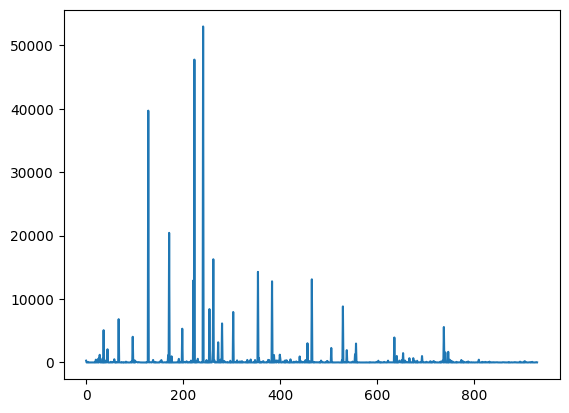

In [20]:
plt.plot(np.sum(suppliersClassificationData[classes].to_numpy(), axis=-1))

# Устаревший код

Код дальше считается устаревшим, потому что он работал в предположении, что одному почтовому индексу соответствуют разные поставщики. Если это предположение окажется всё-таки верным, то следует использовать наработки отсюда.

Ничего, кроме почтового индекса и города (причём сам город нам не нужен - он закодирован в почтовом индексе) поставщика мы не знаем. Возможно, что есть два разных поставщика с одним почтовым индексом (тем более, как мне кажется, в больших городах), но на этом этапе мы пока не узнаем.
Таким образом, считаем, что почтовый индекс однозначно задаёт нам поставщика.

In [49]:
assert False #чтобы следующие ячейки не запускались

AssertionError: 

In [ ]:
len(suppliersData['П/индекс'].unique())

In [ ]:
len(suppliersData['Город'].unique())

Дадим каждому почтовому индексу в соответствие набор айдишников, по которым поставщик числился в закупках и офертах:

In [ ]:
suppliersPostalIndices = suppliersData['П/индекс'].unique()

Нас не интересует почтовый индекс 111111 (явно фигня какая-то), Nan-ы и индексы не российского формата (сразу обрубим иностранные компании)

In [ ]:
suppliersIDDictionary = suppliersData.groupby('П/индекс')['Кредитор'].apply(list).to_dict()

In [ ]:
t = 0
for postal_code, ids in suppliersIDDictionary.items():
    t += 1
    print(f'Почтовый индекс: {postal_code}, ID: {ids}')
    if t > 10:
        break

In [ ]:
suppliersData[suppliersData['П/индекс'] == '105082']

In [ ]:
P = r'^[1-9]\d{5}$' # выражение, ограничивающее нас российскими адресами
suppliersIDDictionary = dict(filter(lambda x: re.match(P, x[0]), suppliersIDDictionary.items()))

In [ ]:
t = 0
for postal_code, ids in suppliersIDDictionary.items():
    t += 1
    print(f'Почтовый индекс: {postal_code}, ID: {ids}')
    if t > 10:
        break

In [ ]:
len(suppliersData)

In [ ]:
suppliersData[suppliersData['П/индекс'].isnull() & suppliersData['Город'].isnull()]

Оказалось, что не только РФ использует шестизначные почтовые индексы, но и, например, Казахстан - 010000